In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("german_credit_data.csv")

In [20]:
# Dropping the serial no. column
df = df.drop(['Unnamed: 0'], axis=1)

In [21]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [22]:
df['Saving accounts'] = df['Saving accounts'].fillna('none')
df['Checking account'] = df['Checking account'].fillna('none')
print(df)

     Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0     67    male    2     own            none           little           1169   
1     22  female    2     own          little         moderate           5951   
2     49    male    1     own          little             none           2096   
3     45    male    2    free          little           little           7882   
4     53    male    2    free          little           little           4870   
..   ...     ...  ...     ...             ...              ...            ...   
995   31  female    1     own          little             none           1736   
996   40    male    3     own          little           little           3857   
997   38    male    2     own          little             none            804   
998   23    male    2    free          little           little           1845   
999   27    male    2     own        moderate         moderate           4576   

     Duration              

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [24]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [30]:
features = df.columns.tolist()

Boxplots before removing outliers:

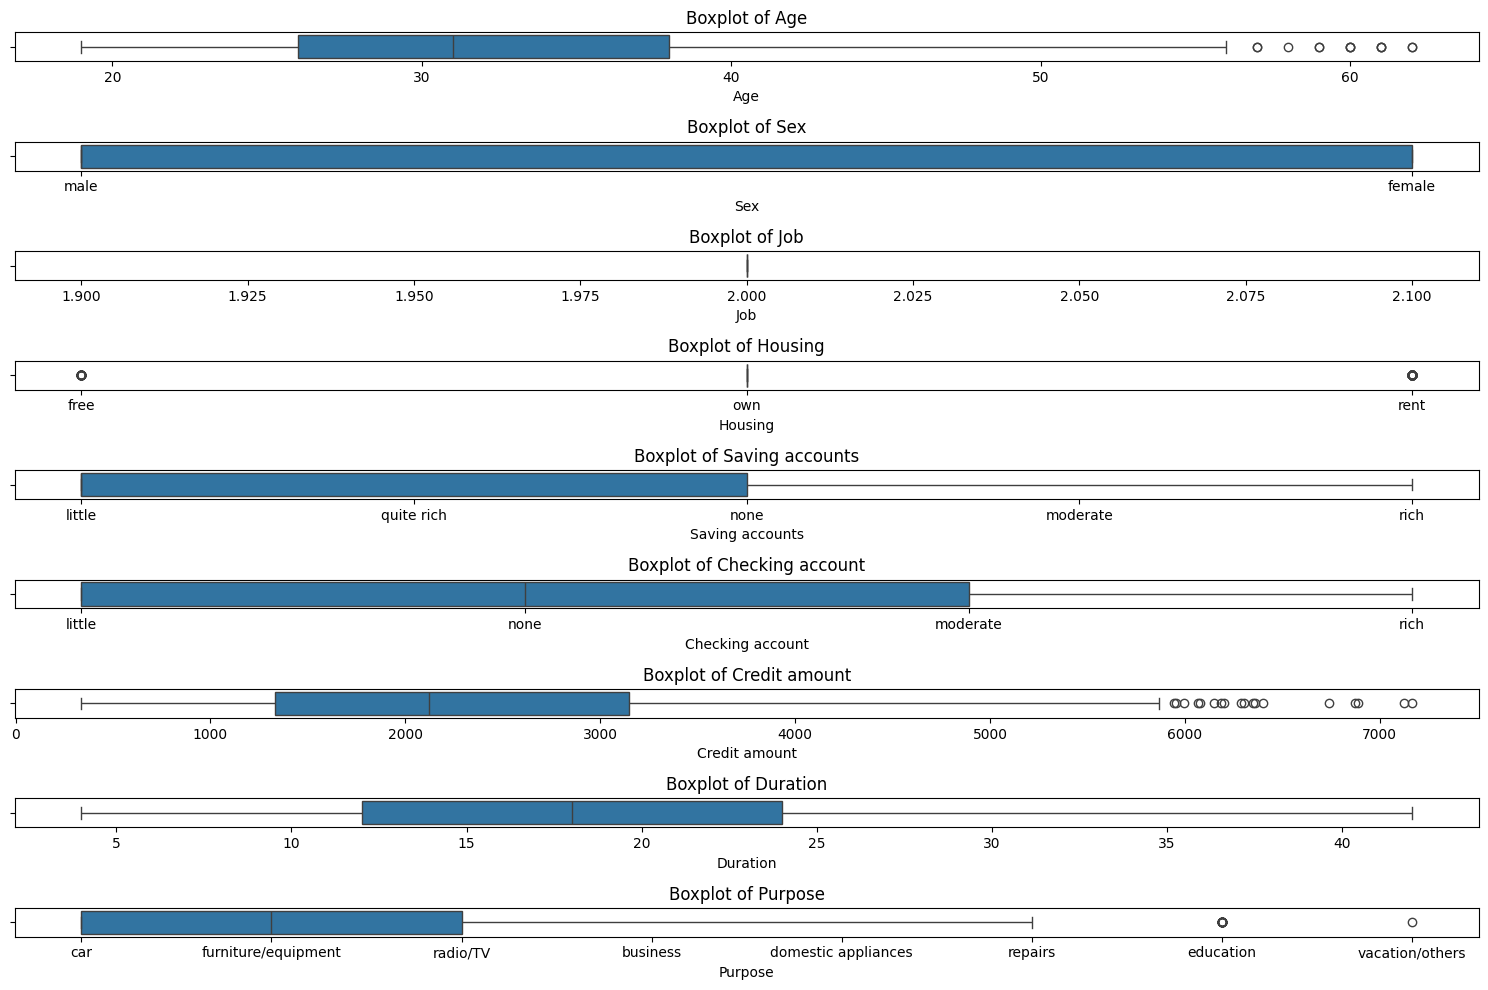

In [31]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()

Boxplots after removing outliers:

In [28]:
for column in df.select_dtypes(include=['int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

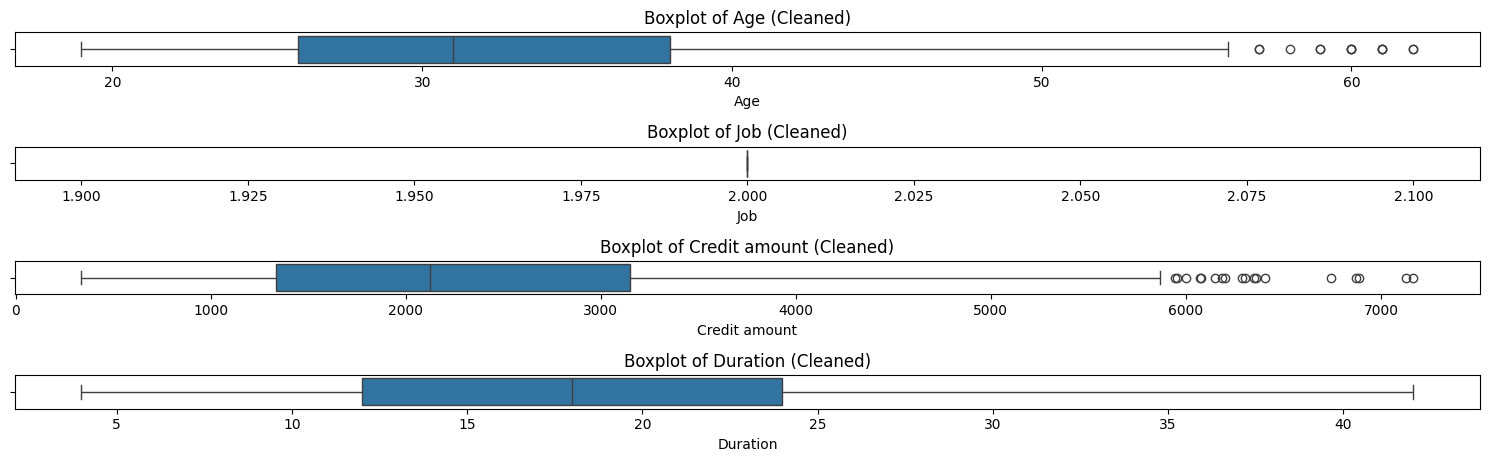

In [32]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(df.select_dtypes(include=['int64']).columns.tolist(), 1):
    plt.subplot(len(features), 1, i)
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature} (Cleaned)")
plt.tight_layout()
plt.show()